# Import 

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Match 1

In [53]:
match1 = pd.read_json('use_case_footbar/match_1.json')

In [54]:
match1.head()

,label,norm
0,walk,"[23.177037336396975, 23.361525285249378, 21.53..."
1,walk,"[20.998214383911275, 19.182798059840767, 18.27..."
2,walk,"[21.95259682019565, 20.62720484424047, 22.5554..."
3,walk,"[19.39209748358647, 19.30460665293087, 18.9787..."
4,rest,"[22.069263037713093, 19.672270483203395, 19.88..."


In [55]:
def read_norm(dataFrame):
    # Split the arrays in column 'norm' and create new columns
    new_columns = pd.DataFrame(dataFrame['norm'].apply(pd.Series))
    # Rename the new columns with 'norm_' prefix and index + 1
    new_columns = new_columns.rename(columns=lambda x: 'norm_' + str(x + 1))
    # Concatenate the new columns with the original DataFrame
    dataFrame = pd.concat([dataFrame, new_columns], axis=1)
    
    return dataFrame

In [56]:
match1 = read_norm(match1)
match1.head()

,label,norm,norm_1,norm_2,norm_3,norm_4,norm_5,norm_6,norm_7,norm_8,...,norm_218,norm_219,norm_220,norm_221,norm_222,norm_223,norm_224,norm_225,norm_226,norm_227
0,walk,"[23.177037336396975, 23.361525285249378, 21.53...",23.177037,23.361525,21.535253,23.400315,23.007525,22.927317,23.143662,22.916891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,walk,"[20.998214383911275, 19.182798059840767, 18.27...",20.998214,19.182798,18.272491,19.690260,20.830143,18.688537,19.612758,18.163000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,walk,"[21.95259682019565, 20.62720484424047, 22.5554...",21.952597,20.627205,22.555408,20.016869,20.381994,21.571995,20.039704,19.102857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,walk,"[19.39209748358647, 19.30460665293087, 18.9787...",19.392097,19.304607,18.978771,22.324970,21.747552,19.331224,19.102857,19.690260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,rest,"[22.069263037713093, 19.672270483203395, 19.88...",22.069263,19.672270,19.882150,21.101266,20.078084,20.936662,20.492237,19.416972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
match1.shape

(574, 229)

In [58]:
null_values = match1.isnull().mean()  * 100
null_values

label        0.000000
norm         0.000000
norm_1       0.000000
norm_2       0.348432
norm_3       0.348432
              ...    
norm_223    99.825784
norm_224    99.825784
norm_225    99.825784
norm_226    99.825784
norm_227    99.825784
Length: 229, dtype: float64

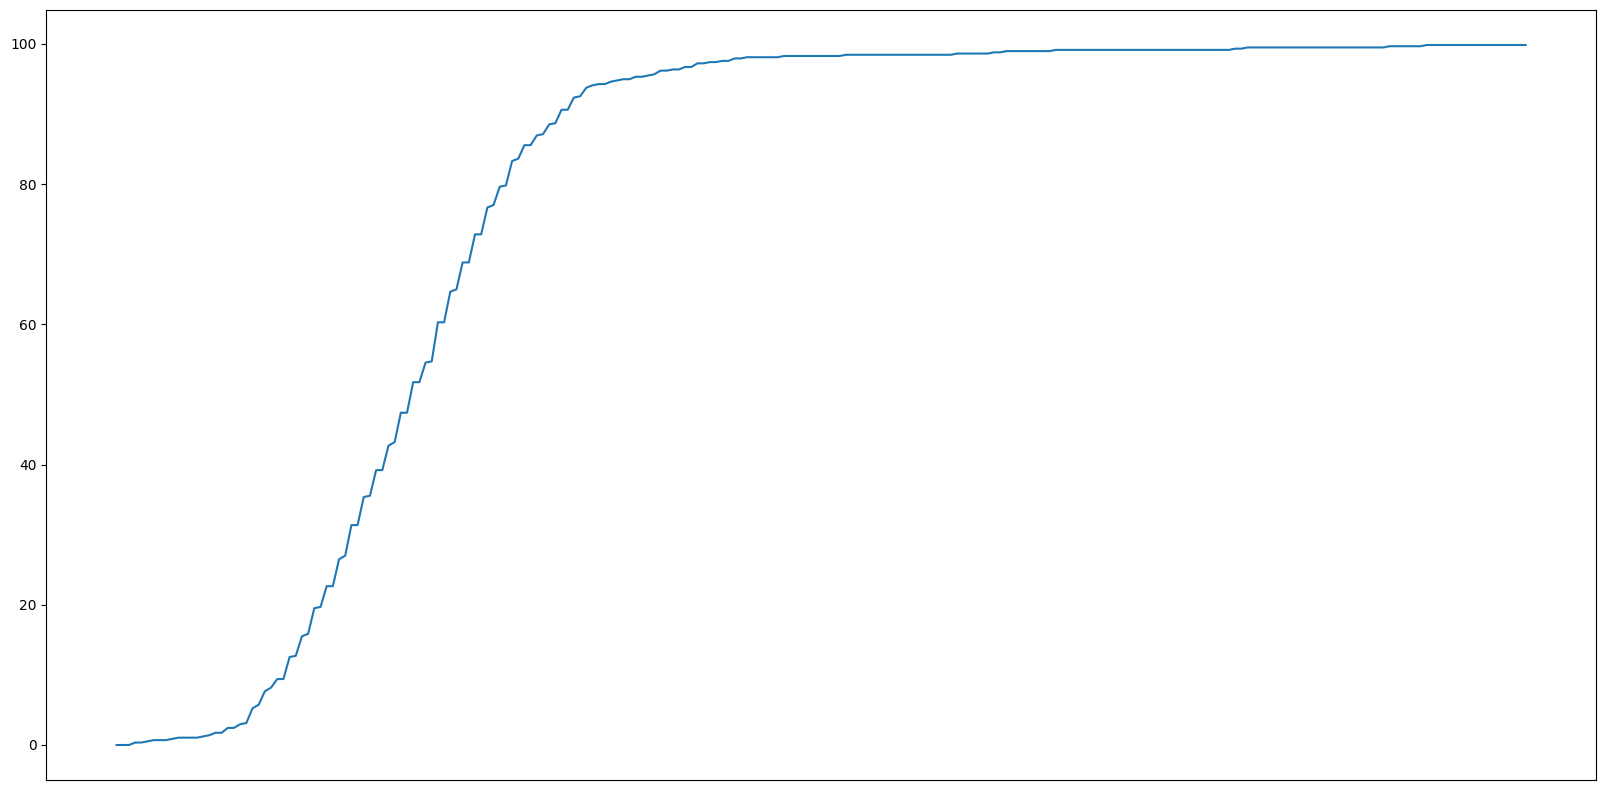

In [59]:
plt.figure(figsize=(20,10))
plt.xticks([])
plt.plot(null_values)

Suppression des gaits trop courtes et trop longues  
50 HZ donc 50 valeurs par seconde.   
Gaits < 0.1 secondes <=> moins de 5 valeurs <=> colonne norm_6 = 0     
Gaits > 3 secondes   <=> plus de 150 valeurs <=> colonne 151 > 0  

(on rappel que si on a une valeur sur norm_N, alors norm_N-1 contient forcément une valeur)

In [60]:
match1 = match1[(match1['norm_150'].isnull()) & (match1['norm_6'] > 0)]

In [61]:
match1.shape

(564, 229)

In [62]:
match1 = match1.iloc[:, : 152] # On cut a 150, afin d'avoir un nombre rond pour le modèle

In [63]:
match1.shape

(564, 152)

In [64]:
null_values = match1.isnull().mean()  * 100
null_values

label         0.0
norm          0.0
norm_1        0.0
norm_2        0.0
norm_3        0.0
            ...  
norm_146    100.0
norm_147    100.0
norm_148    100.0
norm_149    100.0
norm_150    100.0
Length: 152, dtype: float64

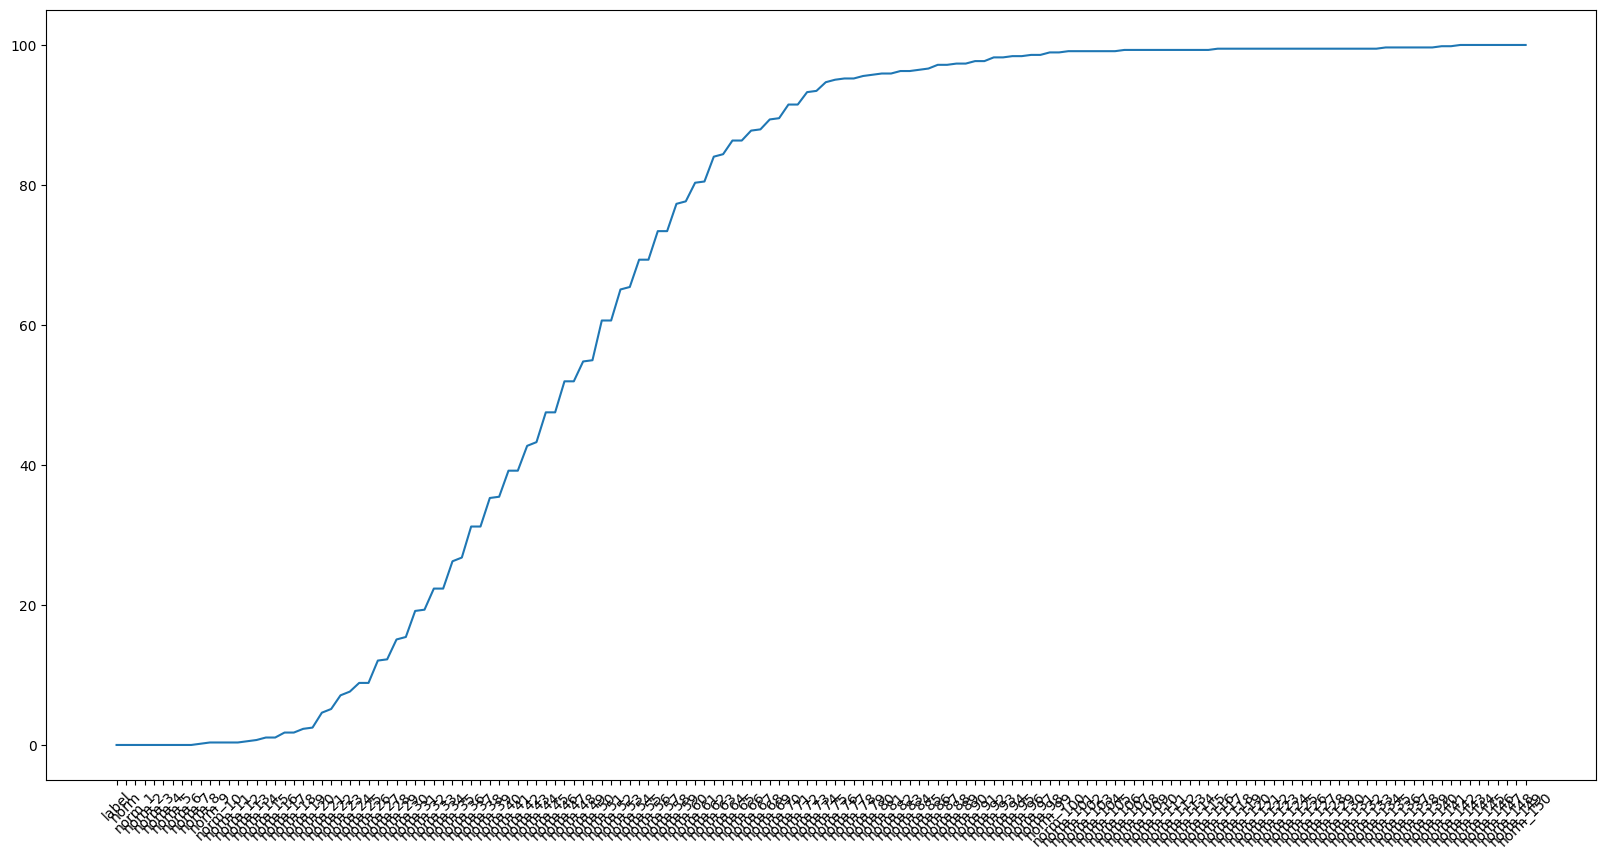

In [65]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 45)
plt.plot(null_values)

In [66]:
mean_data = match1.groupby(by=['label']).mean()

C:\Users\yassi\AppData\Local\Temp\ipykernel_33148\1822631441.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data = match1.groupby(by=['label']).mean()


In [67]:
def plot2D(data):
    # Plot each row as a 2D scatter plot
    for index, row in data.iterrows():
        plt.plot(row.index, row.values)

    # Customize the plot (optional)
    plt.xlabel('Column Index')
    plt.ylabel('Value')
    plt.title('2D Scatter Plot for Each Row')
    plt.legend()
    plt.grid(True)
    # Hide x-axis labels
    plt.xticks([])
    # Display legend
    plt.legend(data.index)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


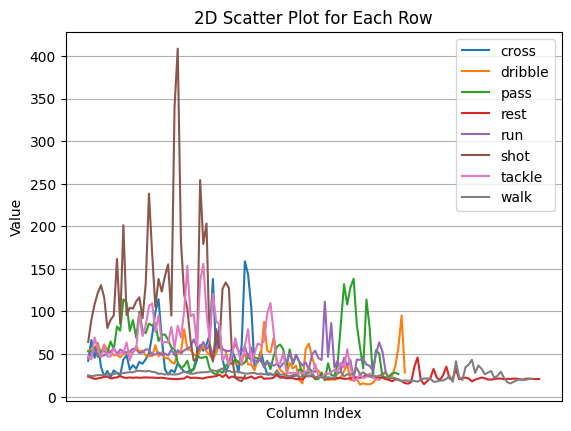

In [68]:
plot2D(mean_data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


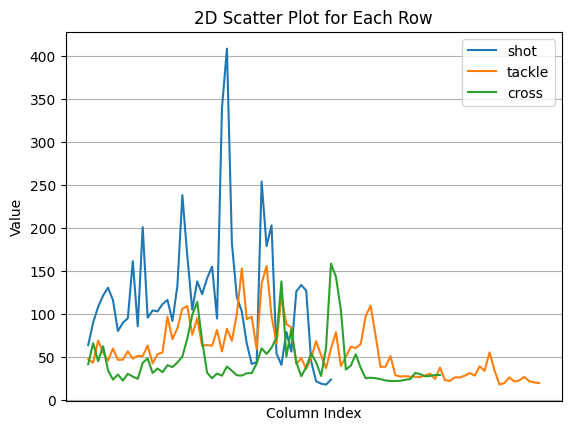

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


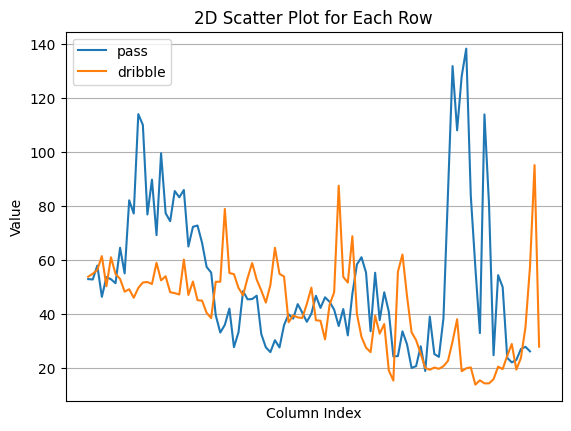

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


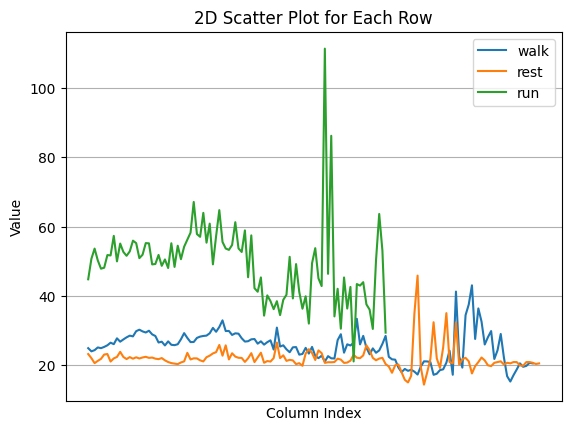

In [69]:
mean_data_high = mean_data.loc[['shot','tackle','cross']]
plot2D(mean_data_high)

mean_data_medium = mean_data.loc[['pass','dribble']]
plot2D(mean_data_medium)

mean_data_low = mean_data.loc[['walk','rest', 'run']]
plot2D(mean_data_low)

Notes :  

Tir = les données sont très courtes. On identifie clairement le pic correspondant à la frappe  
Tacle = On observe plusieurs pics. On ne sait pas si le tacle est debout ou glissé. Un tacle glissé serait peut être un peu plus constant, du lancé jusqu'au choc avec la balle  
Passe : celui là me parait bizarre. Peut être une réception suivi de la passe pour expliquer les 2 pics ?   
repos et marche : se ressemble beaucoup. Le repos est peut être statique, mais le joueur garde ses jambes en mouvements, prêt à repartir.   

le tir et la course sont relativement courts 

In [70]:
# Calculate the number of non-NaN values in each row using apply() and lambda function
match1['non_nan_count'] = match1.apply(lambda row: row.count(), axis=1) - 2  # Subtract 2 to exclude 'label' and 'norm' column

# Calculate the mean number of non-NaN values grouped by the 'label' column
describe_non_nan_count_by_label = match1.groupby('label')['non_nan_count'].describe()
describe_non_nan_count_by_label

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
cross,3.0,60.000000,15.874508,42.0,54.0,66.0,69.0,72.0
dribble,42.0,41.595238,16.850938,8.0,32.0,37.0,51.5,100.0
pass,23.0,41.739130,23.112801,13.0,23.5,35.0,53.5,98.0
rest,21.0,67.428571,30.291206,22.0,38.0,70.0,82.0,142.0
run,207.0,38.690821,14.376392,7.0,29.5,38.0,44.0,94.0
shot,5.0,32.600000,14.432602,19.0,21.0,27.0,46.0,50.0
tackle,20.0,44.200000,17.922641,26.0,29.5,40.0,54.0,92.0
walk,243.0,54.847737,15.373231,20.0,47.0,54.0,62.0,140.0


In [71]:
match1.drop(columns=['non_nan_count'],inplace=True)

Effectivement, le tir et la course sont les plus courts en moyenne, tandis que le repos est long.  
La passe en l'air est relativement longue. Probablement des passes de la tête, qui demandent de sauter ?  

Nous avons par contre très peu de tir et de passe en l'air. Beaucoup de course et de marche

Avec 2 fois plus de dribbles que de passes, je parierais sur un mileu latéral, qui reçoit des ballons, et essaye de percer les lignes. Mais au vu du nombre de "cross", qui devrait prendre en compte les centres, cela n'a pas l'air d'être latéral offensif.

In [72]:
norm_columns = [col for col in match1.columns if 'norm_' in col]
def describe_match(dataFrame):
    
    describe = pd.DataFrame()
    temp = pd.DataFrame()
    temp['label'] = dataFrame['label']
    
    # Find the maximum value per row
    temp['max'] = dataFrame[norm_columns].max(axis=1)
    temp['min'] = dataFrame[norm_columns].min(axis=1)
    temp['sum'] = dataFrame[norm_columns].sum(axis=1)
    temp['count'] = dataFrame[norm_columns].count(axis=1)

    # Group by 'label' and find the maximum value again
    result = temp.groupby('label')['max'].max()
    describe['max'] = result
    describe['min'] = temp.groupby('label')['min'].min()

    # We calculate the mean AFTER calculating the full sum and the full count, otherwise it can be wrong
    describe['mean'] = temp.groupby('label')['sum'].sum() / temp.groupby('label')['count'].sum() 
    display(describe)

In [73]:
match1.head()

,label,norm,norm_1,norm_2,norm_3,norm_4,norm_5,norm_6,norm_7,norm_8,...,norm_141,norm_142,norm_143,norm_144,norm_145,norm_146,norm_147,norm_148,norm_149,norm_150
0,walk,"[23.177037336396975, 23.361525285249378, 21.53...",23.177037,23.361525,21.535253,23.400315,23.007525,22.927317,23.143662,22.916891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,walk,"[20.998214383911275, 19.182798059840767, 18.27...",20.998214,19.182798,18.272491,19.690260,20.830143,18.688537,19.612758,18.163000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,walk,"[21.95259682019565, 20.62720484424047, 22.5554...",21.952597,20.627205,22.555408,20.016869,20.381994,21.571995,20.039704,19.102857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,walk,"[19.39209748358647, 19.30460665293087, 18.9787...",19.392097,19.304607,18.978771,22.324970,21.747552,19.331224,19.102857,19.690260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,walk,"[19.92032356700904, 19.672270483203395, 18.688...",19.920324,19.672270,18.688537,21.535253,22.501236,23.319423,21.450603,21.151404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
describe_match(match1)

,max,min,mean
label,,,
cross,312.592872,4.101426,46.742724
dribble,695.401987,3.979596,50.824108
pass,530.397813,6.387849,59.880001
rest,81.644714,5.072868,22.168000
run,759.861414,1.674630,52.537638
shot,775.479360,16.777270,120.917308
tackle,739.277191,3.561442,68.641166
walk,549.575068,2.168487,27.535569


In [75]:
# Distribution
(match1['label'].value_counts() / match1.shape[0]  )

walk       0.430851
run        0.367021
dribble    0.074468
pass       0.040780
rest       0.037234
tackle     0.035461
shot       0.008865
cross      0.005319
Name: label, dtype: float64

# Match 2

In [76]:
match2 = pd.read_json('use_case_footbar/match_2.json')
match2 = read_norm(match2)
match2.head()

,label,norm,norm_1,norm_2,norm_3,norm_4,norm_5,norm_6,norm_7,norm_8,...,norm_714,norm_715,norm_716,norm_717,norm_718,norm_719,norm_720,norm_721,norm_722,norm_723
0,no action,"[104.42423889328715, 87.63989343949717, 128.52...",104.424239,87.639893,128.526185,85.282528,114.847673,112.245450,75.911198,190.318267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,run,"[108.03112639951678, 92.57566083451651, 81.303...",108.031126,92.575661,81.303113,102.364229,50.450668,49.956157,49.588561,26.801281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pass,"[17.837163554142162, 39.435455203974186, 51.64...",17.837164,39.435455,51.644511,44.520596,34.516532,39.424743,45.658762,69.053259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,rest,"[21.91843920469922, 18.11914155706377, 21.7137...",21.918439,18.119142,21.713781,23.093661,20.362746,20.358772,18.388742,20.474529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,walk,"[20.86063916182152, 17.8097748446304, 14.35537...",20.860639,17.809775,14.355374,14.753570,14.804956,17.992224,16.480466,15.514642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
match2.shape

(613, 725)

In [78]:
match2 = match2[(match2['norm_151'].isnull()) & (match2['norm_6'] > 0)]
match2 = match2.iloc[:, : 152]

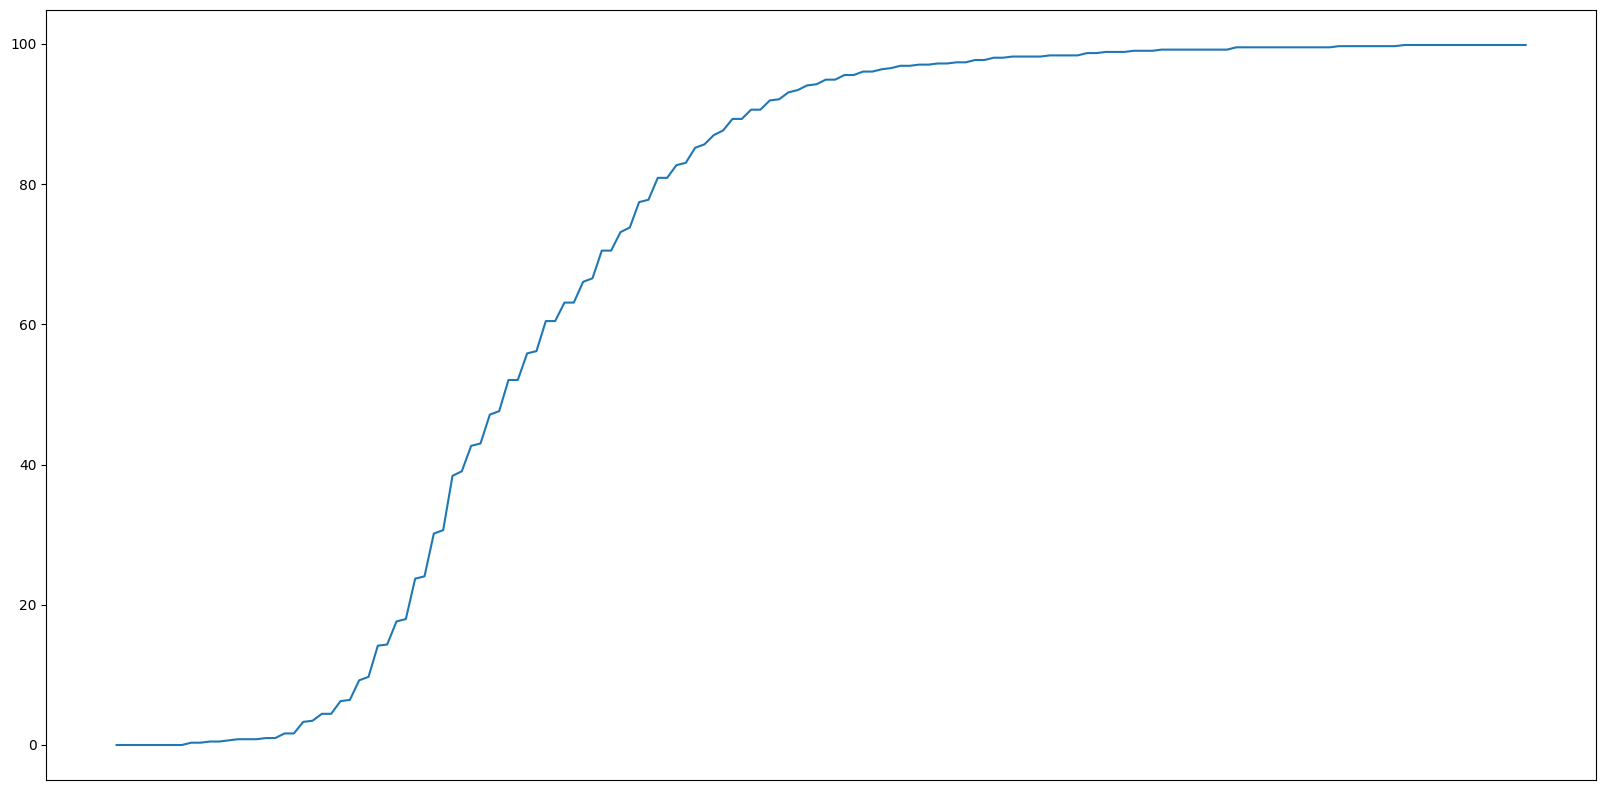

In [79]:
null_values = match2.isnull().mean()  * 100
plt.figure(figsize=(20,10))
plt.xticks([])
plt.plot(null_values)

In [80]:
mean_data = match2.groupby(by=['label']).mean()

C:\Users\yassi\AppData\Local\Temp\ipykernel_33148\3706765366.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data = match2.groupby(by=['label']).mean()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


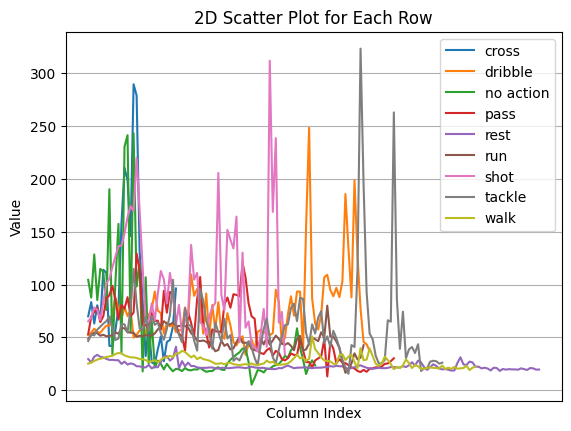

In [81]:
plot2D(mean_data)

In [82]:
# Calculate the number of non-NaN values in each row using apply() and lambda function
match2['non_nan_count'] = match2.apply(lambda row: row.count(), axis=1) - 2  # Subtract 2 to exclude 'label' and 'norm' column

# Calculate the mean number of non-NaN values grouped by the 'label' column
describe_non_nan_count_by_label = match2.groupby('label')['non_nan_count'].describe()
describe_non_nan_count_by_label

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
cross,1.0,30.000000,NaN,30.0,30.0,30.0,30.0,30.0
dribble,34.0,38.470588,16.141862,18.0,26.0,35.0,47.5,94.0
no action,1.0,76.000000,NaN,76.0,76.0,76.0,76.0,76.0
pass,8.0,50.375000,30.918961,26.0,28.0,30.5,78.5,102.0
rest,7.0,90.714286,47.772776,18.0,60.0,104.0,121.5,150.0
run,343.0,37.247813,12.976580,6.0,30.0,34.0,42.0,92.0
shot,12.0,36.750000,19.007774,6.0,20.5,37.5,49.0,66.0
tackle,11.0,49.909091,33.378000,20.0,30.0,38.0,52.0,118.0
walk,190.0,54.789474,15.854761,8.0,46.0,54.0,62.0,129.0


In [83]:
match2.drop(columns=['non_nan_count'],inplace=True)

In [84]:
describe_match(match2)

,max,min,mean
label,,,
cross,289.691916,24.805225,93.892171
dribble,719.929057,4.413516,66.170070
no action,243.294300,5.185455,49.327903
pass,574.898891,6.310896,65.754777
rest,101.942747,13.097407,23.431410
run,711.175891,2.224842,53.626698
shot,566.657366,10.425894,102.514322
tackle,724.262021,5.434624,60.651127
walk,452.433459,1.999615,29.336933


In [100]:
(match2['label'].value_counts() / match2.shape[0]  )

run          0.565074
walk         0.313015
dribble      0.056013
shot         0.019769
tackle       0.018122
pass         0.013180
rest         0.011532
no action    0.001647
cross        0.001647
Name: label, dtype: float64

In [86]:
# match1[['label'] + norm_columns].to_csv('match1_prepro.csv', index=False)
# match2[['label'] + norm_columns].to_csv('match2_prepro.csv', index=False)

## Concatenation 

In [89]:
matchs = pd.concat([match1, match2])[['label'] + norm_columns]
matchs[['label'] + norm_columns].shape

(1171, 151)

In [90]:
describe_match(matchs)

,max,min,mean
label,,,
cross,312.592872,4.101426,53.478359
dribble,719.929057,3.979596,57.394491
no action,243.294300,5.185455,49.327903
pass,574.898891,6.310896,61.617003
rest,101.942747,5.072868,22.559158
run,759.861414,1.674630,53.207055
shot,775.479360,10.425894,107.480691
tackle,739.277191,3.561442,65.580084
walk,549.575068,1.999615,28.325534


# Data Augmentation

Translation aléatoire entre +10 et +50 m.s-2
Opération réalisé 5 fois par ligne

In [93]:
# Common translation value for each row
translation_value = np.random.uniform(low=10, high=50, size=(1, len(matchs.columns) - 1))

# Duplicate the original DataFrame for each translation
num_translations = 5
translated_dfs = [matchs.copy() for _ in range(num_translations)]

# Apply the common translation value to each duplicated DataFrame
for i in range(num_translations):
    translated_dfs[i][matchs.columns[1:]] += translation_value

# Concatenate the original and translated DataFrames
result_df = pd.concat([matchs] + translated_dfs, ignore_index=True)

In [94]:
print(result_df.shape)

(7026, 151)


# Nans

In [97]:
result_df = result_df.fillna(0)

# Ecriture

In [98]:
result_df.to_csv('actions_prepro.csv', index=False)